In [11]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.linalg import solve

- По моментам
- (III) тип граничных условий

$$
S'(a) = S'(b) \quad
S''(a) = S''(b)
$$

In [12]:
A, B = [0, -1], [np.pi, 1]

In [13]:
def f1(x, k):
    return np.sin(k * x)

def f2(x, k): 
    return k / (1 + 9 * x ** 2)

test_funcs = [f1, f2]

func_names = ['$\\sin(kx)$', '$\\frac{k}{1 + 9x^2}$']

In [14]:
def gen_random_points(start, stop, N, is_rand=True): 
    x = np.linspace(start, stop, N)
    h = x[1] - x[0]
    if is_rand:
        for idx in range(1, len(x) - 1):
            x[idx] += np.random.random() * 2 * h / 3 - h / 3

    return x

In [15]:
def build_periodic_spline_moments(x, y):
    n = len(x) - 1
    
    h = np.array([x[i+1] - x[i] for i in range(n)])
    
    f_first = np.array([(y[i+1] - y[i]) / h[i] for i in range(n)])
    
    A = np.zeros((n, n))
    d = np.zeros(n)
    
    for i in range(1, n):
        A[i, i-1] = h[i] / (h[i-1] + h[i])  # μ_i
        A[i, i] = 2
        A[i, (i+1) % n] = h[i-1] / (h[i-1] + h[i])  # λ_i
        d[i] = 6 * (f_first[i] - f_first[i-1]) / (h[i-1] + h[i])
    
    A[0, 0] = 2
    A[0, 1] = h[0] / (h[n-1] + h[0])  # λ_0
    A[0, n-1] = h[n-1] / (h[n-1] + h[0])  # μ_0
    d[0] = 6 * (f_first[0] - f_first[n-1]) / (h[n-1] + h[0])
    
    m = solve(A, d)
    m = np.append(m, m[0])
    
    return m, h

In [16]:
def periodic_spline_eval(x, y, m, h, x_eval):
    n = len(x) - 1
    y_eval = np.zeros_like(x_eval)
    
    for i, x_val in enumerate(x_eval):
        idx = np.searchsorted(x, x_val) - 1
        idx = max(0, min(idx, n-1))

        t = (x_val - x[idx]) / h[idx]

        H00 = (1 - t)**2 * (1 + 2*t)
        H01 = t**2 * (3 - 2*t)
        H10 = t * (1 - t)**2 * h[idx]
        H11 = t**2 * (t - 1) * h[idx]

        y_eval[i] = (H00 * y[idx] + H01 * y[idx+1] + 
                     H10 * (y[idx+1] - y[idx])/h[idx] + 
                     H11 * (y[idx+1] - y[idx])/h[idx] +
                     H10 * m[idx]/6 + H11 * m[idx+1]/6)
    
    return y_eval

In [17]:
is_rand = False

[]

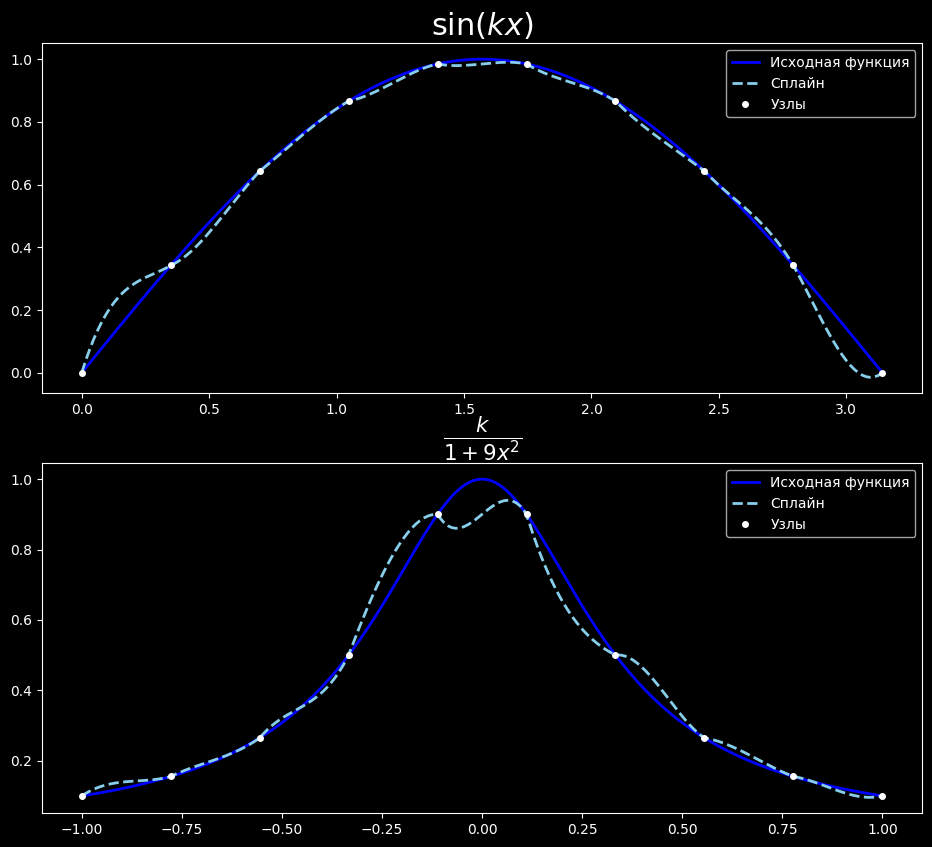

In [18]:
k, N = 1, 10

plt.figure(figsize=(25, 10))

for idx in range(2):
    f = test_funcs[idx]
    a, b = A[idx], B[idx]

    x = gen_random_points(a, b, N, is_rand)
    y = f(x, k)

    m, h = build_periodic_spline_moments(x, y)
    
    x_dense = np.linspace(a, b, 200)
    y_dense = f(x_dense, k)
    y_spline = periodic_spline_eval(x, y, m, h, x_dense)

    plt.subplot(2, 2, idx * 2 + 1)
    plt.title(f'{func_names[idx]}', fontsize=22)
    plt.plot(x_dense, y_dense, 'blue', label='Исходная функция', linewidth=2)
    plt.plot(x_dense, y_spline, color='skyblue', linestyle='--', label='Сплайн', linewidth=2)
    plt.plot(x, y, 'wo', label='Узлы', markersize=4)
    plt.legend()

plt.plot()

[]

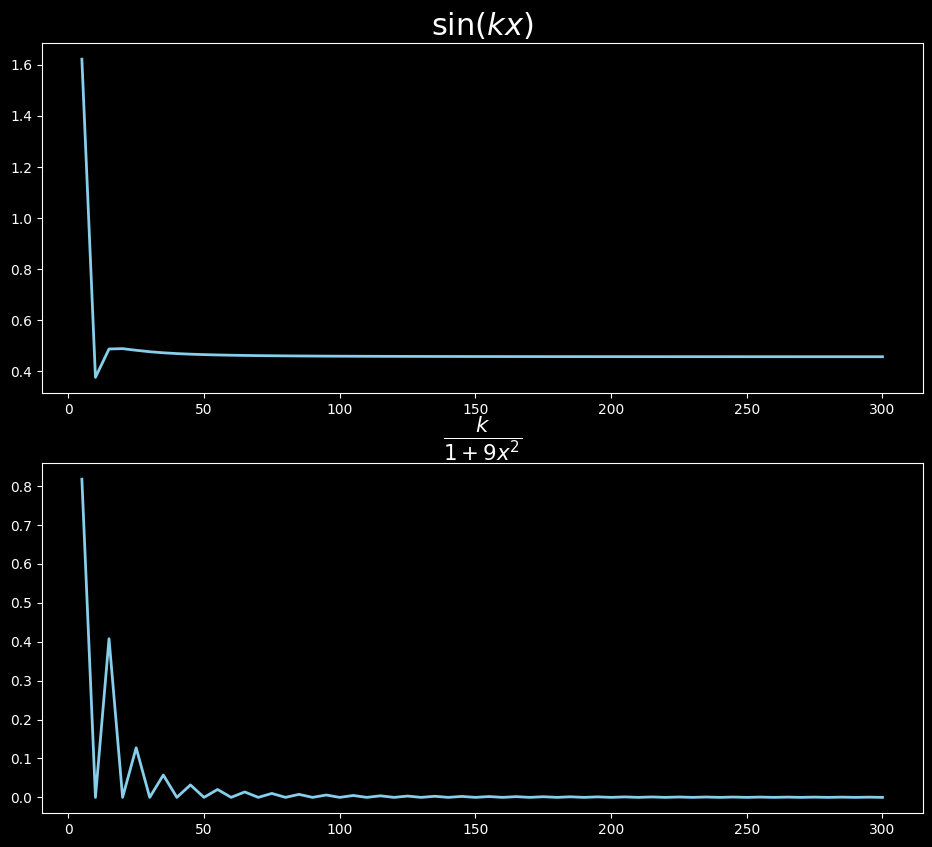

In [19]:
k = 5

plt.figure(figsize=(25, 10))

for idx in range(2):
    errors = []
    N_vals = np.arange(5, 300 + 1, 5)

    for N in N_vals:
        f = test_funcs[idx]
        a, b = A[idx], B[idx]

        x = gen_random_points(a, b, N, is_rand)
        y = f(x, k)

        m, h = build_periodic_spline_moments(x, y)
        
        x_dense = (x[1:] - x[:-1]) / 2
        y_dense = f(x_dense, k)
        y_spline = periodic_spline_eval(x, y, m, h, x_dense)

        errors.append(np.mean(np.abs(y_dense - y_spline)))

    plt.subplot(2, 2, idx * 2 + 1)
    plt.title(f'{func_names[idx]}', fontsize=22)
    plt.plot(N_vals, errors, color='skyblue', linewidth=2)

plt.plot()

[]

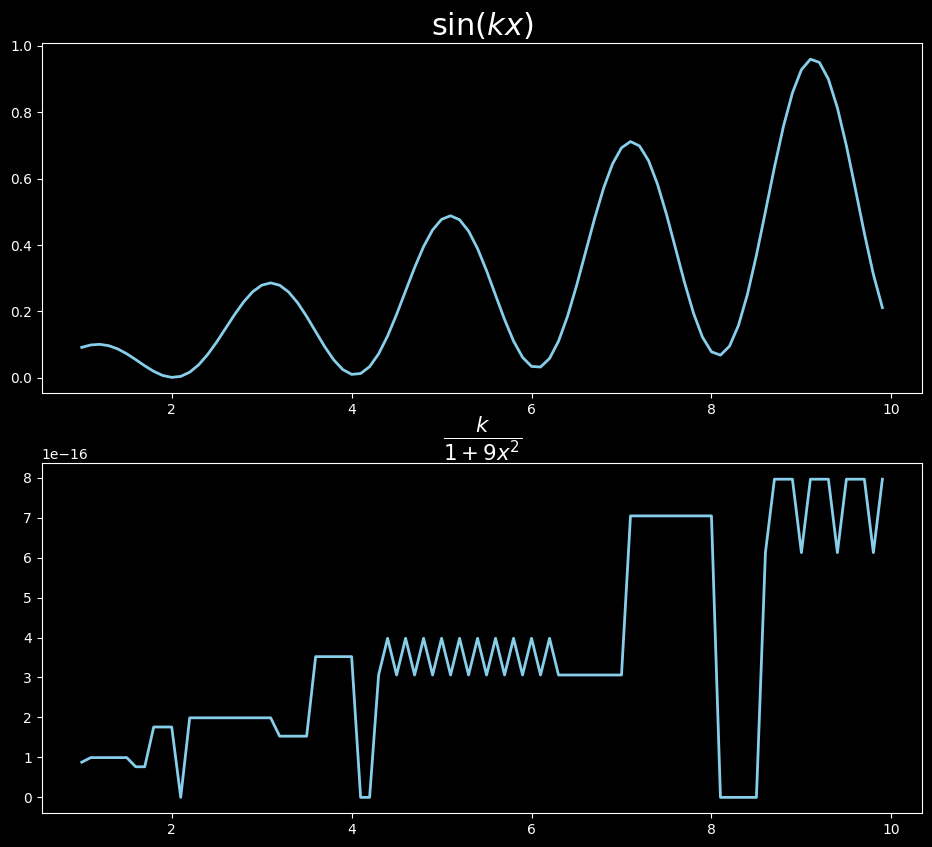

In [20]:
N = 30

plt.figure(figsize=(25, 10))

for idx in range(2):
    errors = []
    k_vals = np.arange(1, 10, 0.1)

    for k in k_vals:
        f = test_funcs[idx]
        a, b = A[idx], B[idx]

        x = gen_random_points(a, b, N, is_rand)
        y = f(x, k)

        m, h = build_periodic_spline_moments(x, y)
        
        x_dense = (x[1:] - x[:-1]) / 2
        y_dense = f(x_dense, k)
        y_spline = periodic_spline_eval(x, y, m, h, x_dense)

        errors.append(np.mean(np.abs(y_dense - y_spline)))

    plt.subplot(2, 2, idx * 2 + 1)
    plt.title(f'{func_names[idx]}', fontsize=22)
    plt.plot(k_vals, errors, color='skyblue', linewidth=2)

plt.plot()